<a href="https://colab.research.google.com/github/BhavnaJadhav/INSAIDML2/blob/main/ML2_Forest_Cover_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install yellowbrick

In [18]:
---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
  - **1.1** [**Conditional Probability**](#Section11)
  - **1.2** [**Bayes Theorem**](#Section12)
  - **1.3** [**Pros/Cons of Naive Bayes**](#Section13)

**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing Libraries**](#Section31)
  - **3.2** [**Upgrading Libraries**](#Section32)
  - **3.3** [**Importing Libraries**](#Section33)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)
  - **4.2** [**Data Information**](#Section42)

**5.** [**Data Pre-processing**](#Section5)<br>
  - **5.1** [**Pre-Profiling Report**](#Section51)<br>

**6.** [**Exploratory Data Analysis**](#Section6)<br>
**7.** [**Post Data Processing & Feature Selection**](#Section7)<br>
  - **7.1** [**Data Standardization**](#Section71)<br>
  - **7.2** [**Feature Selection using Random Forest**](#Section72)<br>
  - **7.3** [**Data Preparation**](#Section73)<br>

**8.** [**Model Development & Evaluation**](#Section8)<br>
  - **8.1** [**Naive Bayes - Baseline Model**](#Section81)<br>
  - **8.2** [**SMOTE Technique & its Implementation**](#Section82)<br>
  - **8.3** [**Naive Bayes - Oversampled Model**](#Section83)<br>

**9.** [**Conclusion**](#Section9)<br>



SyntaxError: ignored

In [2]:
#-------------------------------------------------------------------------------------------------------------------------------

import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis) 
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity      
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
from matplotlib.pylab import rcParams                               # Backend used for rendering and GUI integration                                               
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from random import randint                                          # Importing to generate random integers
from sklearn.preprocessing import StandardScaler                    # Importing standard scaler to perform standardization
from sklearn.feature_selection import SelectFromModel               # To select features from model using Yellow bricks
#from yellowbrick.model_selection import FeatureImportances          # To select important features out of the model
from yellowbrick.classifier import ClassificationReport

#-------------------------------------------------------------------------------------------------------------------------------
from imblearn.over_sampling import SMOTE                            # To handle class imbalance problem
from sklearn.metrics import precision_recall_curve                  # For precision and recall metric estimation
from sklearn.metrics import classification_report                   # To generate complete report of evaluation metrics
from sklearn.metrics import plot_confusion_matrix                   # To plot confusion matrix 
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part     
from sklearn.naive_bayes import GaussianNB                          # To create a naive bayes model using algorithm
from sklearn.ensemble import RandomForestClassifier                 # To create a random forest model using algorithm
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported f

In [ ]:
The study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. Each observation is a 30m x 30m patch. 
You are asked to predict an integer classification for the forest cover type. The seven types are:
1 - Spruce/Fir
2 - Lodgepole Pine
3 - Ponderosa Pine
4 - Cottonwood/Willow
5 - Aspen
6 - Douglas-fir
7 - Krummholz
The  set (15120 observations) contains both features and the Cover_Type. 
Data Fields
Elevation - Elevation in meters
Aspect - Aspect in degrees azimuth
Slope - Slope in degrees
Horizontal_Distance_To_Hydrology - Horz Dist to nearest surface water features
Vertical_Distance_To_Hydrology - Vert Dist to nearest surface water features
Horizontal_Distance_To_Roadways - Horz Dist to nearest roadway
Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice
Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice
Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice
Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition points
Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation
Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation
Cover_Type (7 types, integers 1 to 7) - Forest Cover Type designation
The wilderness areas are:
1 - Rawah Wilderness Area
2 - Neota Wilderness Area
3 - Comanche Peak Wilderness Area
4 - Cache la Poudre Wilderness Area
The soil types are:
1 Cathedral family - Rock outcrop complex, extremely stony.
2 Vanet - Ratake families complex, very stony.
3 Haploborolis - Rock outcrop complex, rubbly.
4 Ratake family - Rock outcrop complex, rubbly.
5 Vanet family - Rock outcrop complex complex, rubbly.
6 Vanet - Wetmore families - Rock outcrop complex, stony.
7 Gothic family.
8 Supervisor - Limber families complex.
9 Troutville family, very stony.
10 Bullwark - Catamount families - Rock outcrop complex, rubbly.
11 Bullwark - Catamount families - Rock land complex, rubbly.
12 Legault family - Rock land complex, stony.
13 Catamount family - Rock land - Bullwark family complex, rubbly.
14 Pachic Argiborolis - Aquolis complex.
15 unspecified in the USFS Soil and ELU Survey.
16 Cryaquolis - Cryoborolis complex.
17 Gateview family - Cryaquolis complex.
18 Rogert family, very stony.
19 Typic Cryaquolis - Borohemists complex.
20 Typic Cryaquepts - Typic Cryaquolls complex.
21 Typic Cryaquolls - Leighcan family, till substratum complex.
22 Leighcan family, till substratum, extremely bouldery.
23 Leighcan family, till substratum - Typic Cryaquolls complex.
24 Leighcan family, extremely stony.
25 Leighcan family, warm, extremely stony.
26 Granile - Catamount families complex, very stony.
27 Leighcan family, warm - Rock outcrop complex, extremely stony.
28 Leighcan family - Rock outcrop complex, extremely stony.
29 Como - Legault families complex, extremely stony.
30 Como family - Rock land - Legault family complex, extremely stony.
31 Leighcan - Catamount families complex, extremely stony.
32 Catamount family - Rock outcrop - Leighcan family complex, extremely stony.
33 Leighcan - Catamount families - Rock outcrop complex, extremely stony.
34 Cryorthents - Rock land complex, extremely stony.
35 Cryumbrepts - Rock outcrop - Cryaquepts complex.
36 Bross family - Rock land - Cryumbrepts complex, extremely stony.
37 Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.
38 Leighcan - Moran families - Cryaquolls complex, extremely stony.
39 Moran family - Cryorthents - Leighcan family complex, extremely stony.
40 Moran family - Cryorthents - Rock land complex, extremely stony.


In [ ]:
Problem Satement 

### Data Acquisition & Description

The study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. Each observation is a 30m x 30m patch. 
The  set (15120 observations) contains both features and the Cover_Type. 
#
1 - Spruce/Fir
2 - Lodgepole Pine
3 - Ponderosa Pine
4 - Cottonwood/Willow
5 - Aspen
6 - Douglas-fir
7 - Krummholz


In [4]:
f1 = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-3/master/Projects/Forestcover_train.csv')


In [22]:
print(f1.shape)
f1.head()


(15120, 56)


,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [ ]:
Data Description**

- In this section we will get **information about the data** and see some observations.

In [25]:
f1.describe(include = 'all')

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000
mean,7560.50000,2749.32255,156.67665,16.50159,227.19570,51.07652,1714.02321,212.70430,218.96561,135.09200,1511.14729,0.23790,0.03300,0.41991,0.30919,0.02348,0.04120,0.06362,0.05575,0.01091,0.04299,0.00000,0.00007,0.00066,0.14167,0.02685,0.01501,0.03148,0.01118,0.00000,0.00754,0.04048,0.00397,0.00304,0.00919,0.00106,0.02282,0.05007,0.01700,0.00007,0.00357,0.00099,0.00060,0.08538,0.04795,0.02196,0.04563,0.04074,0.00146,0.00675,0.00066,0.00225,0.04815,0.04345,0.03036,4.00000
std,4364.91237,417.67819,110.08580,8.45393,210.07530,61.23941,1325.06636,30.56129,22.80197,45.89519,1099.93649,0.42581,0.17865,0.49356,0.46218,0.15142,0.19877,0.24409,0.22945,0.10390,0.20284,0.00000,0.00813,0.02571,0.34872,0.16166,0.12161,0.17462,0.10513,0.00000,0.08651,0.19708,0.06287,0.05508,0.09544,0.03251,0.14933,0.21809,0.12927,0.00813,0.05966,0.03148,0.02439,0.27946,0.21367,0.14655,0.20870,0.19770,0.03812,0.08186,0.02571,0.04737,0.21409,0.20388,0.17157,2.00007
min,1.00000,1863.00000,0.00000,0.00000,0.00000,-146.00000,0.00000,0.00000,99.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
25%,3780.75000,2376.00000,65.00000,10.00000,67.00000,5.00000,764.00000,196.00000,207.00000,106.00000,730.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2.00000
50%,7560.50000,2752.00000,126.00000,15.00000,180.00000,32.00000,1316.00000,220.00000,223.00000,138.00000,1256.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,4.00000
75%,11340.25000,3104.00000,261.00000,22.00000,330.00000,79.00000,2270.00000,235.00000,235.00000,167.00000,1988.25000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00

### Observations : 
- Mean Elevation is 2749.32255
- Mean aspect is 156.67665
- Mean slope is 16.50159
- Average values for Horizontal_Distance_To_Hydrology	= 227     ,Vertical_Distance_To_Hydrology = 61, 	Horizontal_Distance_To_Roadways = 1325.066,
Horizontal_Distance_To_Fire_Points  = 1099.936


In [5]:
#rename column to short names 
f1.rename(columns={'Horizontal_Distance_To_Hydrology' : 'hdh'},inplace=True)






In [6]:
f1.rename(columns={'Vertical_Distance_To_Hydrology' : 'vdh'},inplace=True)


In [7]:
f1.rename(columns={'Horizontal_Distance_To_Roadways' : 'hdr'},inplace=True)


In [8]:
f1.rename(columns={'Horizontal_Distance_To_Fire_Points' : 'hdfp'},inplace=True)

In [35]:
f1.head()

,Id,Elevation,Aspect,Slope,hdh,vdh,hdr,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,hdfp,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [36]:
f1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Id                15120 non-null  int64
 1   Elevation         15120 non-null  int64
 2   Aspect            15120 non-null  int64
 3   Slope             15120 non-null  int64
 4   hdh               15120 non-null  int64
 5   vdh               15120 non-null  int64
 6   hdr               15120 non-null  int64
 7   Hillshade_9am     15120 non-null  int64
 8   Hillshade_Noon    15120 non-null  int64
 9   Hillshade_3pm     15120 non-null  int64
 10  hdfp              15120 non-null  int64
 11  Wilderness_Area1  15120 non-null  int64
 12  Wilderness_Area2  15120 non-null  int64
 13  Wilderness_Area3  15120 non-null  int64
 14  Wilderness_Area4  15120 non-null  int64
 15  Soil_Type1        15120 non-null  int64
 16  Soil_Type2        15120 non-null  int64
 17  Soil_Type3        15120 non-nul

### Observation :
- No null values 
- All are int64 data types 
- There are total 55 columns 

### Data Pre-Processing

 Pre Profiling Report**

- For **quick analysis** pandas profiling is very handy.

- Generates profile reports from a pandas DataFrame.

- For each column **statistics** are presented in an interactive HTML report.

In [39]:
# profile = ProfileReport(f1 = data)
# profile.to_file(output_file = 'Pre Profiling Report.html')
# print('Accomplished!')

import pandas_profiling
profile = f1.profile_report(title="Forest Cover Analysis Profiling before Data Preprocessing", progress_bar=False, minimal=True)
profile.to_file(output_file="ForestCoverAnalysis_profiling_before_preprocessing.html")

AttributeError: ignored

EDA 

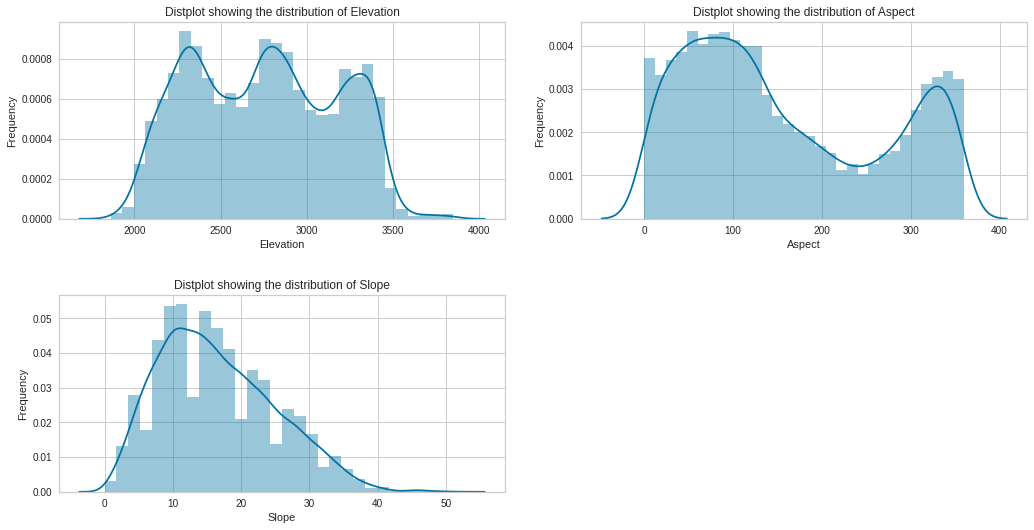

In [46]:
#Distplot 

fig = plt.figure(figsize = [15, 8])
plt.subplot(2, 2, 1)
sns.distplot(f1['Elevation'],30)
plt.xlabel('Elevation')
plt.ylabel('Frequency')
plt.title('Distplot showing the distribution of Elevation')


plt.subplot(2, 2, 2)
sns.distplot(f1['Aspect'],30)
plt.xlabel('Aspect')
plt.ylabel('Frequency')
plt.title('Distplot showing the distribution of Aspect')

plt.subplot(2, 2, 3)
sns.distplot(f1['Slope'],30)
plt.xlabel('Slope')
plt.ylabel('Frequency')
plt.title('Distplot showing the distribution of Slope')

#plt.legend(['Not Fraud', 'Fraud'])
#plt.ylabel(ylabel = 'Class', size = 14)
#plt.title(label = 'Proportion Distribution', size = 14)
plt.tight_layout(pad = 3.0)
#plt.suptitle(t = 'Frequency & Proportion of Fraudulent Transactions', y = 1.02, size = 16)
plt.show()

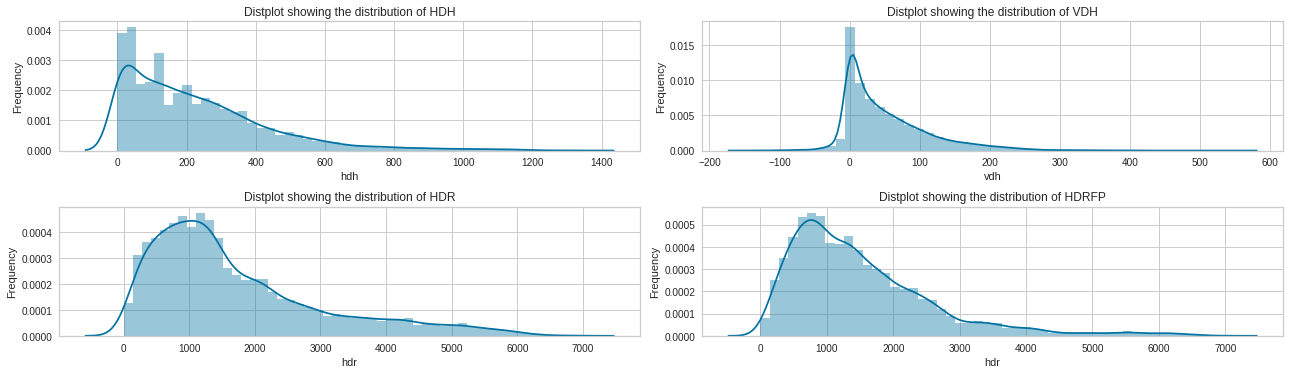

In [71]:
#Distplot subplots

fig = plt.figure(figsize = [18, 10])
plt.subplot(4,2,1)
sns.distplot(f1['hdh'],50)
plt.xlabel('hdh')
plt.ylabel('Frequency')
plt.title('Distplot showing the distribution of HDH')


plt.subplot(4,2, 2)
sns.distplot(f1['vdh'],50)
plt.xlabel('vdh')
plt.ylabel('Frequency')
plt.title('Distplot showing the distribution of VDH')

plt.subplot(4,2, 3)
sns.distplot(f1['hdr'],50)
plt.xlabel('hdr')
plt.ylabel('Frequency')
plt.title('Distplot showing the distribution of HDR')


plt.subplot(4 ,2,4)
sns.distplot(f1['hdfp'],50)
plt.xlabel('hdr')
plt.ylabel('Frequency')
plt.title('Distplot showing the distribution of HDRFP')

#plt.legend(['Not Fraud', 'Fraud'])
#plt.ylabel(ylabel = 'Class', size = 18)
#plt.title(label = 'Proportion Distribution', size = 14)
plt.tight_layout(pad =1)
#plt.suptitle(t = 'Frequency & Proportion of Fraudulent Transactions', y = 1.02, size = 16)
plt.show()

### Observations : 
- hdh : mean = 227.195 ,std = 210.075,  min. hdh = 0 , max hdh = 1343, 50% hdh  = 180
- vdh : mean = 51.076 ,std = 61.239,  min. hdh = -146, max vdh = 554, 50% vdh = 32 
- hdr : mean = 1714.023,std = 1325.066 ,  min. hdh = 0 , max hdr = 6890, 50% hdr = 1316
- hdfp : mean = 1511.147,std = 1099.936,  min. hdh = 0 , max hdfp = 6993, 50% hdfp = 6993

In [62]:
# to find out details at the zero hdh (ignore id col. )
f1[f1['hdh']== 0].sum()
#at0_percent = np.round(drop_nums / before_shape[0], decimals = 5) * 100

Id                  11557969
Elevation            3903039
Aspect                227179
Slope                  18790
hdh                        0
vdh                        0
hdr                  2089004
Hillshade_9am         346107
Hillshade_Noon        356752
Hillshade_3pm         220676
hdfp                 1793796
Wilderness_Area1         190
Wilderness_Area2          19
Wilderness_Area3         426
Wilderness_Area4         955
Soil_Type1                91
Soil_Type2                42
Soil_Type3                96
Soil_Type4               122
Soil_Type5                32
Soil_Type6                67
Soil_Type7                 0
Soil_Type8                 0
Soil_Type9                 1
Soil_Type10              166
Soil_Type11               37
Soil_Type12                1
Soil_Type13               10
Soil_Type14              136
Soil_Type15                0
Soil_Type16               72
Soil_Type17              328
Soil_Type18                2
Soil_Type19               12
Soil_Type20   

In [97]:
#f1.groupby(['Cover_Type']).groups 


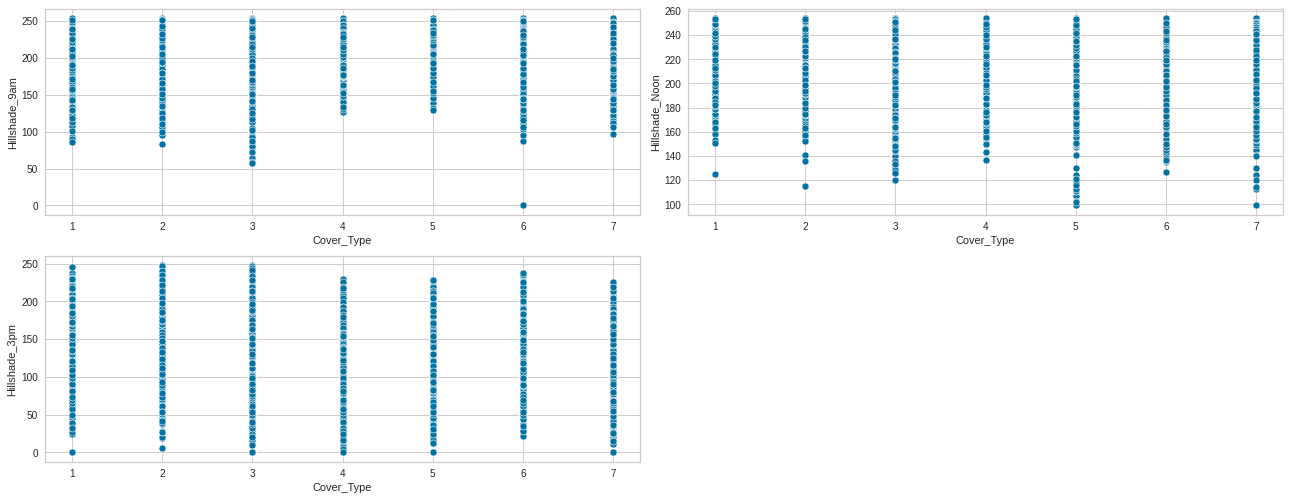

In [108]:
fig = plt.figure(figsize = [18, 10])
plt.subplot(3,2,1)
sns.scatterplot(data= f1, x="Cover_Type", y="Hillshade_9am")
# plt.xlabel('hdh')
# plt.ylabel('Frequency')
# plt.title('Distplot showing the distribution of HDH')


plt.subplot(3,2,2)
sns.scatterplot(data= f1, x="Cover_Type", y="Hillshade_Noon")

plt.subplot(3,2,3)
sns.scatterplot(data= f1, x="Cover_Type", y="Hillshade_3pm")

plt.tight_layout(pad =1)
#plt.suptitle(t = 'Frequency & Proportion of Fraudulent Transactions', y = 1.02, size = 16)
plt.show()

#sns.scatterplot(data= f1, x="Cover_Type", y="Hillshade_Noon")

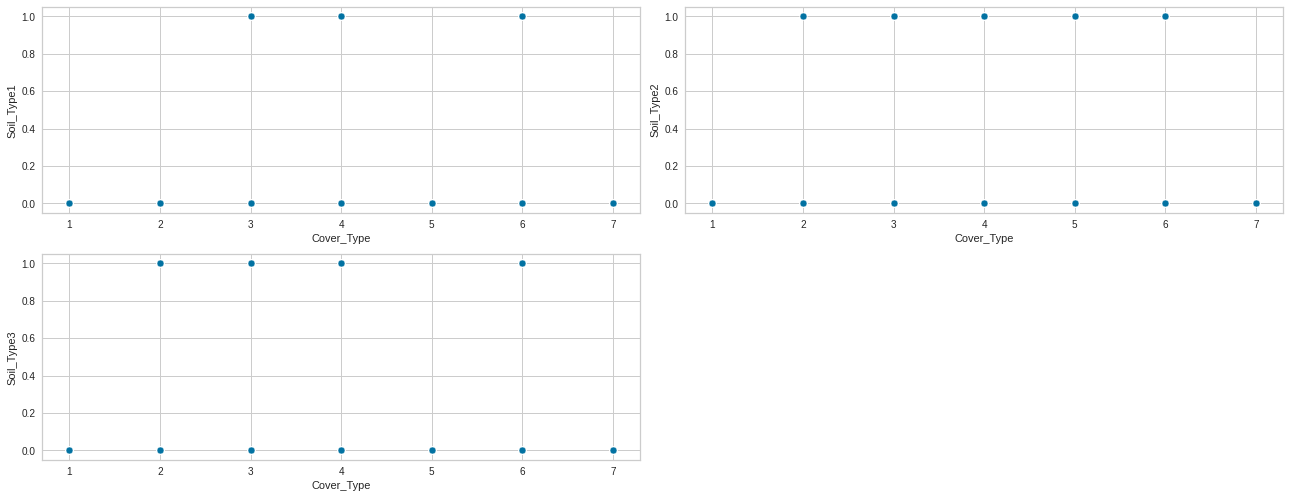

<Figure size 432x288 with 0 Axes>

In [109]:
fig = plt.figure(figsize = [18, 10])
plt.subplot(3,2,1)
sns.scatterplot(data= f1, x="Cover_Type", y="Soil_Type1")
# plt.xlabel('hdh')
# plt.ylabel('Frequency')
# plt.title('Distplot showing the distribution of HDH')


plt.subplot(3,2,2)
sns.scatterplot(data= f1, x="Cover_Type", y="Soil_Type2")

plt.subplot(3,2,3)
sns.scatterplot(data= f1, x="Cover_Type", y="Soil_Type3")

plt.tight_layout(pad =1)
#plt.suptitle(t = 'Frequency & Proportion of Fraudulent Transactions', y = 1.02, size = 16)
plt.show()

#sns.scatterplot(data= f1, x="Cover_Type", y="Hillshade_Noon")

plt.tight_layout(pad =1)
#plt.suptitle(t = 'Frequency & Proportion of Fraudulent Transactions', y = 1.02, size = 16)
plt.show()

In [110]:
sns.pairplot(f1)

KeyboardInterrupt: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f0b19b1d320> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f0b18995ef0> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
sns.pairplot(f1, hue="Cover_Type")